In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
from fur.path_assistant import PathAssistant
shift = PathAssistant('shift_03_10_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
results_dir = shift.get_results_dir()
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data
fluctuations_df = get_fluctuations_df_with_acnet_data(
    shift,
    "res_df_nd_filters_data_03_10_2020.csv",
    "IOTA_1NL_100MeV_v8.6.1.3.6ds_data.txt"
)
from config import get_from_config

In [2]:
fluctuations_df

,waveform_file,ch2_amplitude,var_of_ch1_amplitude,noise_var,file_datetime,rounded_bpm_file_datetime,N:IWCMI,N:IBEAMA,N:IWCMBE,N:IWCMBR,N:IWCMBF,N:IWCMBG,N:IRFEPA,N:ITC1RSH,N:ITC2RSH,N:ITC3RSH,N:ITC4RSH,N:ITC4LSH,N:ITC3LSH,N:ITC2LSH,N:ITC1LSH,N:ITC1RSV,N:ITC2RSV,N:ITC3RSV,N:ITC4RSV,N:ITC4LSV,N:ITC3LSV,N:ITC2LSV,N:ITC1LSV,N:IWCMI_recalibrated_to_IWCMI_absolute,N:IBEAM_recalibrated_to_IWCMI_absolute,Sigma_um_X,Sigma_um_X_err,Sigma_um_Y,Sigma_um_Y_err,Angle_spread_rad_X,Angle_spread_rad_Y,ex_um,ex_err,ey_um,ey_err,dp/p,dp/p_err
0,RefCurve_2020-03-10_10_121356.Wfm.bin,0.330092,1.772634e-08,8.758955e-08,2020-03-10 12:13:56,2020-03-10 11:32:12,-3.093358,-2.802270,29.953456,32.344859,65.094828,28.518824,382.508177,494.067745,1490.18050,1718.52050,732.771,1128.92450,1723.92250,1629.26245,526.110995,114.44035,81.333500,95.904553,105.9989,161.117400,72.665100,71.402653,132.809895,-2.736274,-2.709058,1220.353647,19.309258,89.965576,7.633846,0.000934,0.000121,0.693426,0.023144,0.008224,0.001396,0.000275,0.0
1,RefCurve_2020-03-10_11_121907.Wfm.bin,0.330524,1.762730e-08,8.764898e-08,2020-03-10 12:19:07,2020-03-10 11:35:51,-3.097857,-2.806184,29.897783,32.374912,64.826164,28.430889,382.445280,492.874390,1483.44700,1711.85300,732.771,1125.59400,1718.52310,1622.07100,524.385010,115.71420,81.610001,96.689003,105.9989,162.715390,73.558800,71.875999,135.178600,-2.740254,-2.712842,1215.876879,19.083800,91.031651,7.573475,0.000931,0.000123,0.688000,0.022790,0.008420,0.001401,0.000275,0.0
2,RefCurve_2020-03-10_12_122451.Wfm.bin,0.275670,1.260909e-08,8.668348e-08,2020-03-10 12:24:51,2020-03-10 11:40:03,-3.096819,-2.856270,29.734933,32.018936,64.656244,28.332957,382.424364,480.479000,1452.49500,1675.19690,732.771,1103.68010,1682.80300,1588.15300,513.752010,115.44240,82.073708,97.829498,105.9989,164.805300,74.942101,72.460999,138.439500,-2.739336,-2.761262,1190.768001,18.663058,92.215531,7.541902,0.000911,0.000124,0.659156,0.021827,0.008641,0.001413,0.000272,0.0
3,RefCurve_2020-03-10_13_123150.Wfm.bin,0.276897,1.380891e-08,8.724680e-08,2020-03-10 12:31:50,2020-03-10 11:42:27,-3.098780,-2.852180,29.455165,31.736434,64.323898,28.093982,382.490759,478.321110,1448.07800,1668.82900,732.771,1099.33400,1676.06300,1583.40600,511.426970,118.71730,82.654099,98.804298,105.9989,167.428410,76.405602,73.083900,141.577300,-2.741070,-2.757308,1186.331549,18.714400,93.964662,7.450895,0.000908,0.000127,0.654630,0.021806,0.008972,0.001423,0.000269,0.0
4,RefCurve_2020-03-10_14_123409.Wfm.bin,0.276813,1.289925e-08,8.696409e-08,2020-03-10 12:34:09,2020-03-10 11:46:06,-3.099143,-2.848180,29.392470,31.740029,64.227754,28.021304,382.287726,476.804245,1431.05300,1664.21205,732.771,1092.09550,1651.74550,1578.43805,509.636005,120.16190,82.150852,99.131051,105.9989,167.700345,76.096298,73.299198,142.932150,-2.741392,-2.753441,1177.463515,19.748678,94.448739,7.327323,0.000901,0.000127,0.644327,0.022839,0.009064,0.001406,0.000269,0.0
5,RefCurve_2020-03-10_15_123707.Wfm.bin,0.156156,5.852147e-09,8.776490e-08,2020-03-10 12:37:07,2020-03-10 11:50:09,-3.095244,-2.861315,29.390068,31.748269,64.118456,28.019598,382.224520,475.238890,1436.30700,1657.80590,732.771,1089.34500,1663.57800,1573.15100,507.784030,120.22240,82.780701,99.670799,105.9989,168.659390,77.426804,73.512199,144.182600,-2.737942,-2.766139,1177.865128,18.884387,95.054589,7.345640,0.000901,0.000128,0.644773,0.021847,0.009181,0.001419,0.000270,0.0
6,RefCurve_2020-03-10_16_124126.Wfm.bin,0.156456,6.352127e-09,8.719776e-08,2020-03-10 12:41:26,2020-03-10 11:52:14,-3.095742,-2.845090,29.534337,31.940968,64.341677,28.128255,382.187679,480.426955,1451.89350,1675.99605,732.771,1101.64900,1682.06345,1590.05500,513.445500,117.97410,82.423199,99.052097,105.9989,167.085350,76.409900,73.175503,142.053890,-2.738383,-2.750454,1190.641697,19.008999,93.905914,7.425582,0.000911,0.000127,0.659189,0.022229,0.008960,0.001417,0.000271,0.0
7,RefCurve_2020-03-10_17_124538.Wfm.bin,0.156219,6.083763e-09,8.703252e-08,2020-03-10 12:45:38,2020-03-10 11:5

In [14]:
sigma_x_um, sigma_y_um, sigma_z_cm = fluctuations_df.describe().loc["mean", ["Sigma_um_X", "Sigma_um_Y", "N:IWCMBR"]]
sigma_x = sigma_x_um
sigma_y = sigma_y_um
sigma_z = sigma_z_cm*1e4

In [28]:
from wiggler_radiation.number_of_coherent_modes.coherent_modes \
    import get_My
import numpy as np
from wiggler_radiation.wiggler_radiation import get_photon_flux_3D
from wiggler_radiation.Wigrad.wigrad_generator import get_rad_mesh_tuple

In [29]:
x_1D, y_1D, l_1D = get_rad_mesh_tuple()
i_3D = get_photon_flux_3D(source='wigrad')

In [30]:
My = get_My(sigma_y, get_rad_mesh_tuple(), i_3D)

In [31]:
M = My*sigma_x*sigma_z
M

4256878.181424533

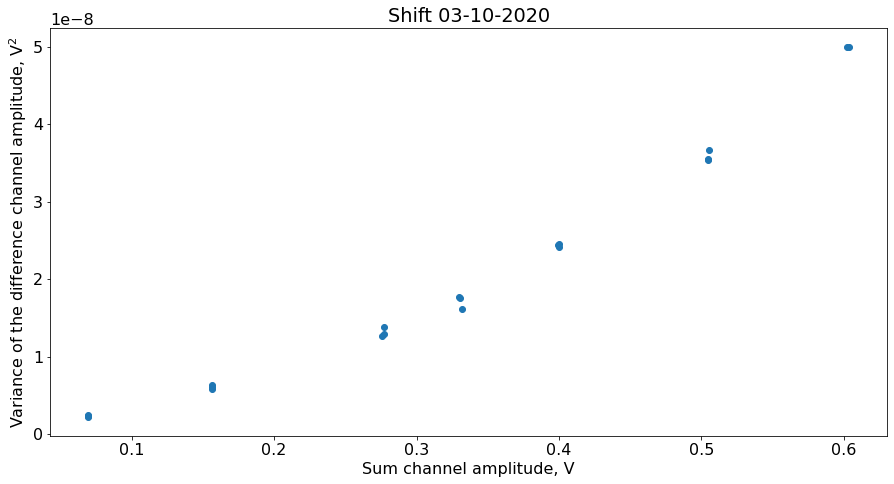

In [5]:
plt.plot(fluctuations_df["ch2_amplitude"].values, fluctuations_df["var_of_ch1_amplitude"].values, 'o')
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.title(r"Shift 03-10-2020")
plt.show()

In [33]:
sum_channel_to_photoelectrons = 1/get_from_config("Beam_current_to_Sum_channel_ampl_V/mA")*1e-3*get_from_config("IOTA_revolution_period")/get_from_config("e")*get_from_config("Measured_photons_per_electron")

In [34]:
N = sum_channel_to_photoelectrons*fluctuations_df["ch2_amplitude"].values
varN = 2*sum_channel_to_photoelectrons**2*fluctuations_df["var_of_ch1_amplitude"].values

In [35]:
from scipy.optimize import curve_fit
def var_theor(x, M):
    return x+1/M*x**2
popt, pcov = curve_fit(var_theor, N, varN)
Mfit = popt[0]
Mfit_err = np.sqrt(np.diag(pcov))[0]
Mfit, Mfit_err

(4419488.15070377, 36735.59040084953)

In [48]:
3.005*get_from_config("IWCMI_to_WCM_ABSOLUTE")

2.658115877930119

In [45]:
def as_si(x, ndp):
    """Returns number in scientific format for latex. For PyPlot when latex output is needed. 
    Latex distibtuion must be installed on the machine. Also set  plt.rcParams["text.usetex"] =True
    Parameters
    ----------
    x
        the input number
    ndp : int
        desired number of decimals
    """
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'${m:s}\times 10^{{{e:d}}}$'.format(m=m, e=int(e))

In [6]:
error_bar = 0#0.33*5.231532189534264e-09*2*sum_channel_to_photoelectrons**2
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(N,varN,marker='o',linestyle='None',yerr=error_bar,color='b', label = 'Measurements in IOTA')
x_aux = np.linspace(0, ax.get_xlim()[1],100)
ax.plot(x_aux, x_aux,color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")
ax.plot(x_aux, var_theor(x_aux, Mfit),color='blue', linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{fit}}\right)\langle\mathcal{N}\rangle^2$")
ax.plot(x_aux, var_theor(x_aux, M),color='red',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{model}}\right)\langle\mathcal{N}\rangle^2$")
ax.legend()
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,0,1,2]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set_title("Fixed $I_{\mathrm{beam}} = 2.67$ mA, different ND filters.")
ax.text(0.05,0.63-0.1,r"$M_{\mathrm{fit}}$"+" = {:s}".format(as_si(Mfit,1)),transform=ax.transAxes)
ax.text(0.05,0.55-0.1,r'$M_{\mathrm{model}}$'+' = {:s}'.format(as_si(M,1)),transform=ax.transAxes)
ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")
plt.show()

NameError: name 'N' is not defined